In [2]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns", None) # to see all columns 

In [ ]:
# construct the decision tree to predict the income <=50K and >50K

In [3]:
data = pd.read_csv('adult.csv')
data.shape

(32561, 15)

In [4]:
# understanding type of values in each column of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# understanding data, how it look like default is 5 rows

data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [6]:
# rows with missing values represented as'?'.
data_missing = data[data.workclass == '?']

# printing only thouse rows which have missing values in them
data_missing.head()

age workclass  fnlwgt     education  education.num      marital.status  \
0    90         ?   77053       HS-grad              9             Widowed   
2    66         ?  186061  Some-college             10             Widowed   
14   51         ?  172175     Doctorate             16       Never-married   
24   61         ?  135285       HS-grad              9  Married-civ-spouse   
44   71         ?  100820       HS-grad              9  Married-civ-spouse   

   occupation   relationship   race     sex  capital.gain  capital.loss  \
0           ?  Not-in-family  White  Female             0          4356   
2           ?      Unmarried  Black  Female             0          4356   
14          ?  Not-in-family  White    Male             0          2824   
24          ?        Husband  White    Male             0          2603   
44          ?        Husband  White    Male             0          2489   

    hours.per.week native.country income  
0               40  United-States  <=50K  
2               40  United-States  <=50K  
14              40  United-States   >50K  
24              32  United-States  <=50K  
44              15  United-States  <=50K

In [7]:
# shape of data_missing
data_missing.shape

(1836, 15)

In [8]:
data_missing.shape[0]

1836

In [ ]:
# finding for % of missing values 
(data_missing.shape[0]/data.shape[0])*100

In [9]:
# dropping rows having missing values in 'workclass'
data = data.drop(data_missing.index,axis=0) # axis 0 mean rows i.e remove thouse row index which have missing values

#Print (first 5) rows of dataframe after dropping
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [10]:
# selecting all categorical variables
only_categorical_columns_of_data = data.select_dtypes(include=['object'])

# checking whether any other columns contains "?"
(only_categorical_columns_of_data == '?').sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [11]:
# dropping "?"s one by one
only_categorical_columns_of_data = data[data.occupation=='?']
data = data.drop(only_categorical_columns_of_data.index,axis=0) 

only_categorical_columns_of_data = data[data['native.country']=='?']  # this method can be used to update both column at once
data = data.drop(only_categorical_columns_of_data.index,axis=0)

In [12]:
# see nan if any
(data == '?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
# selecting all categorical variables
cat_col = [col for col in data.columns if data[col].dtype == 'O']
data_categorical = data[cat_col]

# first 5 rows of categorical columns
data_categorical.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [15]:
from sklearn.preprocessing import LabelEncoder


# initialising LabelEncoder function
LE = LabelEncoder()

# applying encoding on data_categorical
for col in cat_col:
    data_categorical[col] = LE.fit_transform(data_categorical[col])


# printing data_categoricall first 5 rows
data_categorical.head()

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [16]:
# droping all categorical columns from data 
data.drop(cat_col,axis=1,inplace=True)

#concating data_categorical to data(original)
data = pd.concat([data,data_categorical],axis=1)
# printing last 5 rows of data
data.tail()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
32556   22  310152             10             0             0              40   
32557   27  257302             12             0             0              38   
32558   40  154374              9             0             0              40   
32559   58  151910              9             0             0              40   
32560   22  201490              9             0             0              20   

       workclass  education  marital.status  occupation  relationship  race  \
32556          2         15               4          10             1     4   
32557          2          7               2          12             5     4   
32558          2         11               2           6             0     4   
32559          2         11               6           0             4     4   
32560          2         11               4           0             3     4   

       sex  native.country  income  
32556    1              38       0  
32557    0              38       0  
32558    1              38       1  
32559    0              38       0  
32560    1              38       0

In [17]:
# looking at column types in data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [18]:
# converting target variable income to categorical
data['income'] = data['income'].astype('category')

In [19]:
# importing train-test-split 

from sklearn.model_selection import train_test_split

In [20]:
# putting feature variable to X
X = data.drop('income',axis=1)

# putting response or target variable to y
y = data.income

In [21]:
# splitting data into train and test with test size as 30%, and random state as 108
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21113, 14), (9049, 14), (21113,), (9049,))

In [23]:
# importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

In [24]:
# initialising decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read tree
DT_default = DecisionTreeClassifier(max_depth=5)

# fitting descision tree on train & test data
model_DT = DT_default.fit(X_train,y_train)

In [25]:
# importing classification report,confusion matrix and accuracy_score from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
# predicting
y_pred_test_default = model_DT.predict(X_test)

# printing classification report
print(classification_report(y_test,y_pred_test_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6742
           1       0.79      0.54      0.64      2307

    accuracy                           0.85      9049
   macro avg       0.83      0.75      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [27]:
# printing confusion matrix 
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')

# Printing accuracy
print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[6420  322]
 [1062 1245]] 

 Accuracy_Score:
 0.8470549231959332


In [28]:
# import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

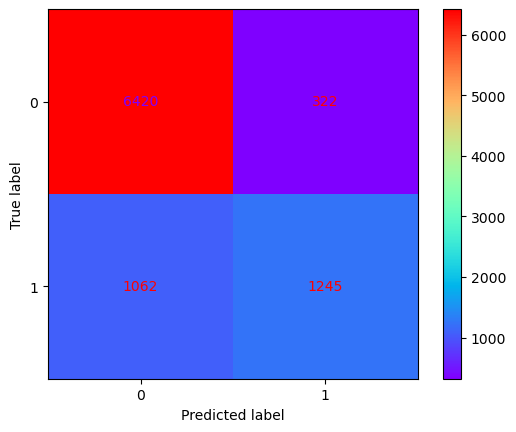

In [29]:
# plot confusion matrix
plot_confusion_matrix(model_DT,X_test,y_test,cmap='rainbow')

In [30]:
# putting all feature names in a list
features_name = list(data.columns)

# putting all classes in list i.e >=50 and <=50
classes = ['>=50', '<=50']

In [31]:
# see features_name
features_name

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [32]:
# see classes
classes

['>=50', '<=50']

In [34]:
# importing required packages for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

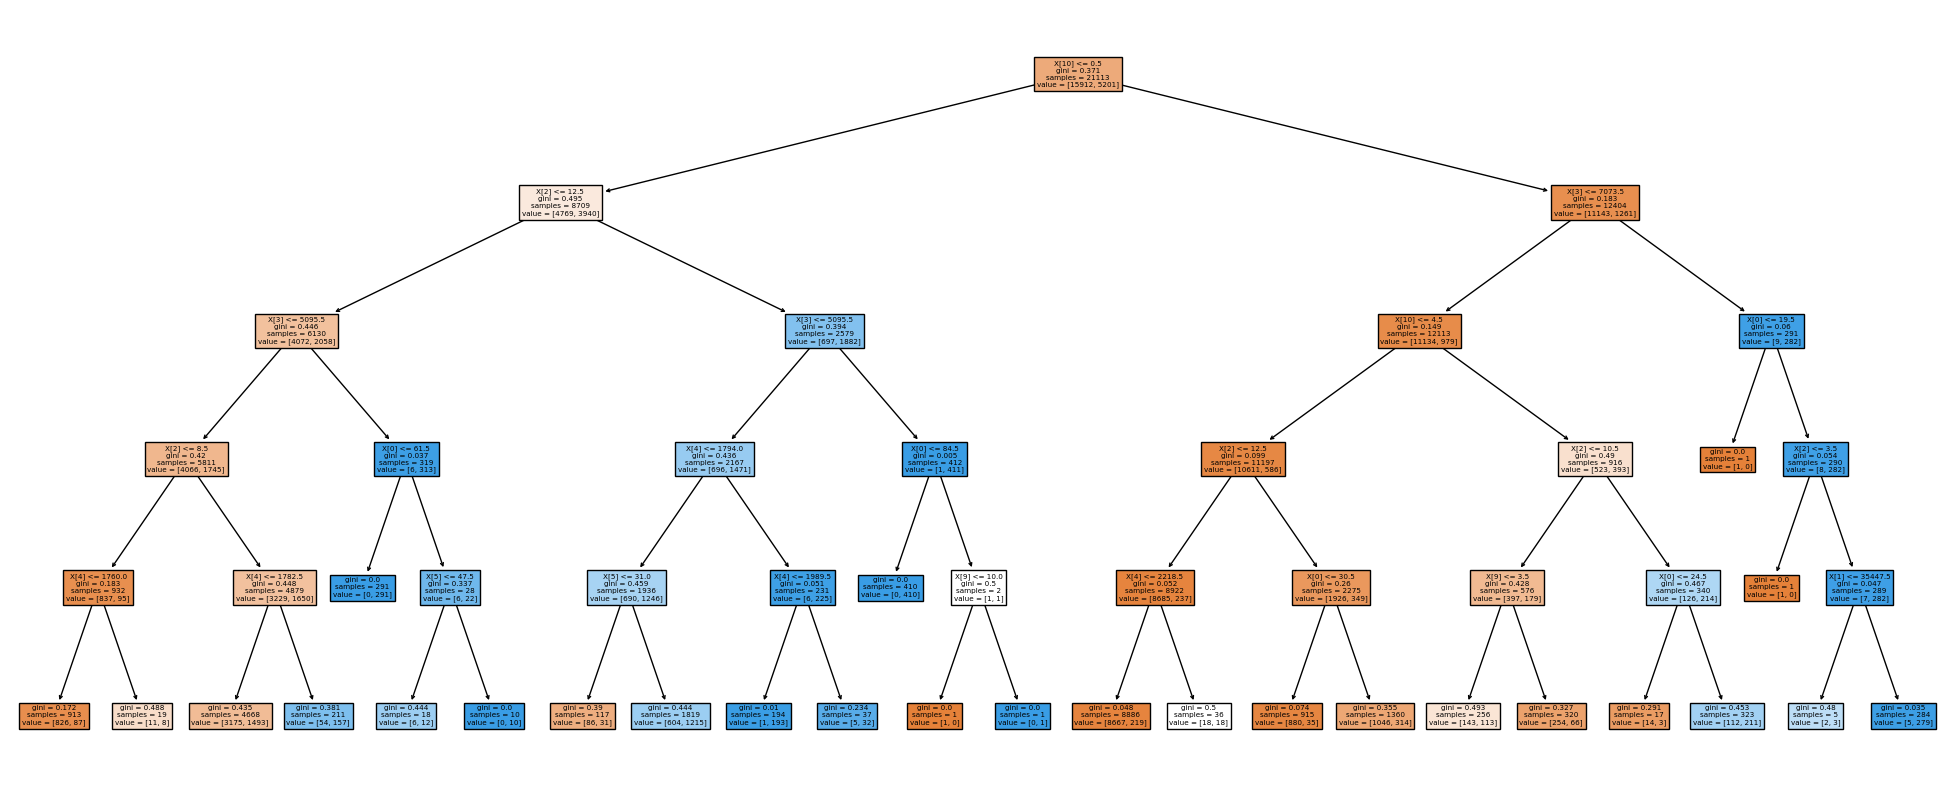

In [35]:
plt.figure(figsize=(25,10))

plot_tree(model_DT,filled=True) # filled=True to fill colour
 
plt.show()

In [36]:
# printig textual representation of a tree 
text_representation = export_text(model_DT)

# printing text_representation
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_4 <= 1760.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1760.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- feature_4 <= 1782.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1782.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- feature_0 <= 61.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  61.50
|   |   |   |   |--- feature_5 <= 47.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  47.50
|   |   |   |   |   |--- class: 1
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_4 <= 1794.00
|   |   |   |   |--- feature_5 <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  31.00
|   |   |   |   |   |--- class: 1
|   |   

# Hyperparameter Decision Tree
`Observe Default Tree it is quite complex and we need to simplify it by tuning its hyperparameters`

In [1]:
# you can see and read about every possible hyperparameter and there working
#help(DecisionTreeClassifier)

# Hyperparameter Tuning
Hyperparameter can be tuned using:
* `KFold Cross Validation`
* `GridSearch Cross Validation`
* `RandomSerch Cross Validation`

# 1. Tuning `max_depth`
First I am trying to find optimum values for `max_depth` and understand `how value of max_depth affects Decision Tree??`

I am trying to create a dataframe with `max_depth` in `range(1to80)` and checking `accuracy_score` corresponding to `each max_depth` 

**`GridSearch consists of`**:
* an `estimator` (classifier such as SVC() or decision tree)
* a `parameter space`
* a `method for searching` or `sampling candidates`(optional) 
* a `cross-validation scheme`
* a `score function`(accuracy, roc_auc etc)

In [40]:
# ImportING Kfold and GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#GridSearchCV to find optimal max_depth

In [41]:
# specifying number of folds for k-fold CV (taking 5)
n_folds = 10
# parameters to build model on (max_depth from range 1 to 50)
parameters = {'max_depth':range(1,50)}

# instantiating model (DecisionTreeClassifier) with criteria gini and random_state as 108
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)

# instantiating GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
#fiting tree on training data
GScv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'max_depth': range(1, 50)}, return_train_score=True,
             scoring='accuracy')

In [42]:
# scores of GridSearchCV
scores_GScv = GScv.cv_results_

#Checking scores in a dataframe
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012280      0.004831         0.002173        0.004607   
1       0.017125      0.005185         0.001874        0.000298   
2       0.025919      0.007184         0.001675        0.001053   
3       0.028355      0.004925         0.001895        0.000631   
4       0.032505      0.008615         0.001665        0.000473   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.753788           0.753788   
1               2  {'max_depth': 2}           0.823864           0.805871   
2               3  {'max_depth': 3}           0.839489           0.819129   
3               4  {'max_depth': 4}           0.845170           0.823390   
4               5  {'max_depth': 5}           0.848485           0.834754   

   split2_test_score  split3_test_score  split4_test_score  split5_test_score  \
0           0.753314           0.753671           0.753671           0.753671   
1           0.834754           0.819043           0.827570           0.833728   
2           0.849905           0.831833           0.842729           0.848413   
3           0.851799           0.834202           0.844150           0.850308   
4           0.858428           0.840360           0.848887           0.852676   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  \
0           0.753671           0.753671           0.753671           0.753671   
1           0.812885           0.823780           0.819517           0.822833   
2           0.828044           0.838939           0.831360           0.837518   
3           0.830412           0.846518           0.836570           0.842255   
4           0.841307           0.852676           0.844150           0.843202   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.753659        0.000124               49            0.753645   
1         0.822384        0.008338               16            0.822588   
2         0.836736        0.008929               11            0.837061   
3         0.840477        0.008648                9            0.841114   
4         0.846493        0.006688                5            0.844324   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.753645            0.753697            0.753658   
1            0.824588            0.821378            0.823124   
2            0.839324            0.835903            0.837807   
3            0.843535            0.840324            0.842438   
4            0.851113            0.848587            0.850753   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.753658            0.753658            0.753658   
1            0.822755            0.822071            0.823808   
2            0.836017            0.835386            0.838333   
3            0.840648            0.839964            0.848069   
4            0.849069            0.843701            0.852542   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.753658            0.753658            0.753658   
1            0.822598            0.823071            0.822703   
2            0.837122            0.837964            0.837280   
3            0.841069            0.842069            0.841438   
4            0.849174            0.850174            0.844964   

   mean_train_score  std_train_score  
0          0.753659         0.000014  
1          0.822868         0.000836  
2          0.837220         0.001147  
3          0.842067         0.002238  
4          0.848440         0.002911

# Visualizing how train and test score changes with max_depth

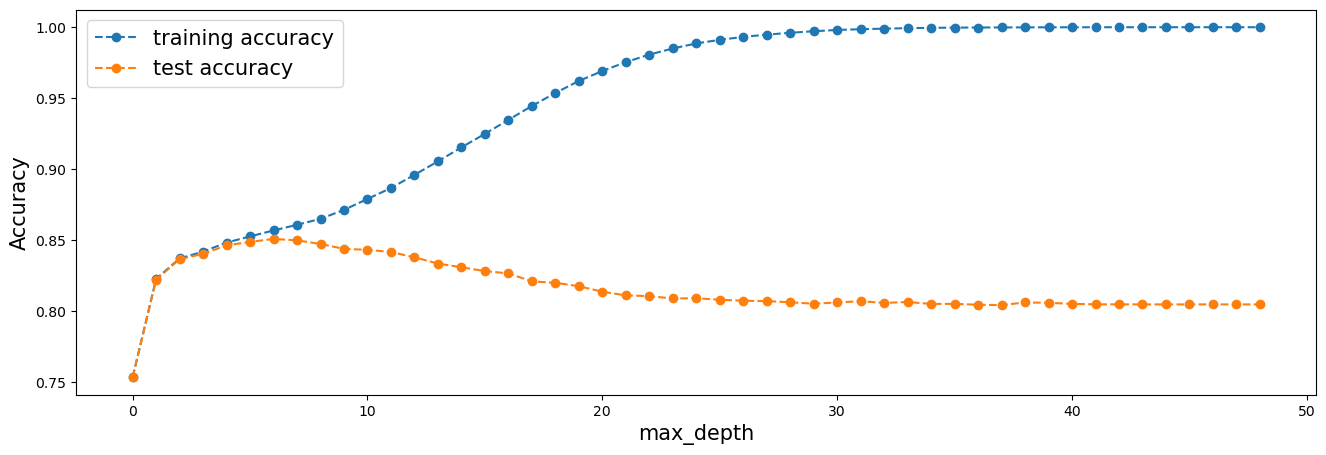

In [43]:
# plotting accuracies with max_depth vs mean train and test scores

plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="upper left", prop={'size':15})
plt.xlabel("max_depth", size=15) 
plt.ylabel("Accuracy", size=15)

plt.show()

As value of max_dept increase, both training and test score increases about maybee max-depth = 6, after which test score gradually reduces <br> 
`Note:`<br> 
* Scores are `average accuracies` across 7-folds
* It is clear that `model is overfitting training data` if max_depth is too high Next


#### Time to see how Model behaves with Other Hyperparameters

# 2. Tuning `min_samples_leaf`


In [47]:
# specifying number of folds for k-fold CV (here 5)
n_folds = 10
# parameters to build  model on(min_samples_leaf with range 5 to 200 and with step of 20)
parameters = {'min_samples_leaf':range(5,200,20)}

# instantiating model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)

# instantiating GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,scoring='accuracy',cv=n_folds,return_train_score=True)
#fitting above tree on training data
GScv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [48]:
# scores of GridSearchCV
scores_GScv = GScv.cv_results_

#Checking scores in a dataframe
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.089794      0.018693         0.003403        0.004243   
1       0.071478      0.012221         0.002406        0.000895   
2       0.068207      0.013556         0.003529        0.003286   
3       0.062804      0.013035         0.002321        0.001940   
4       0.064041      0.013875         0.001594        0.001020   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.835701   
1                     25  {'min_samples_leaf': 25}           0.853693   
2                     45  {'min_samples_leaf': 45}           0.850852   
3                     65  {'min_samples_leaf': 65}           0.854167   
4                     85  {'min_samples_leaf': 85}           0.857008   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.818182           0.834754           0.823780           0.839413   
1           0.834280           0.858902           0.845097           0.840834   
2           0.843277           0.866004           0.847466           0.847939   
3           0.844223           0.860322           0.844623           0.848887   
4           0.841383           0.860322           0.843202           0.849360   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.817622           0.823780           0.819517           0.818569   
1           0.844150           0.837518           0.845571           0.838939   
2           0.849834           0.839413           0.854098           0.846045   
3           0.852676           0.838939           0.855045           0.851729   
4           0.857414           0.834202           0.855045           0.849834   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.822359         0.825368        0.007735               10   
1           0.841781         0.844076        0.007048                9   
2           0.848887         0.849381        0.006743                3   
3           0.850308         0.850092        0.005877                1   
4           0.850308         0.849808        0.007786                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.914215            0.915741            0.913583   
1            0.868796            0.872217            0.869112   
2            0.860955            0.864586            0.862376   
3            0.857692            0.859007            0.858534   
4            0.855323            0.856692            0.855323   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.914272            0.915062            0.915588   
1            0.869277            0.869593            0.870856   
2            0.863751            0.864120            0.862699   
3            0.859646            0.859067            0.859225   
4            0.857226            0.856857            0.856120   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.915167            0.915167            0.914956   
1            0.871540            0.869645            0.871066   
2            0.865488            0.864277            0.863488   
3            0.861173            0.859594            0.858120   
4            0.857647            0.857594            0.855384   

   split9_train_score  mean_train_score  std_train_score  
0            0.914956          0.914871         0.000628  
1            0.870277          0.870238         0.001083  
2            0.861173          0.863291         0.001398  
3            0.858541          0.859060         0.000918  
4            0.857015          0.856518         0.000873

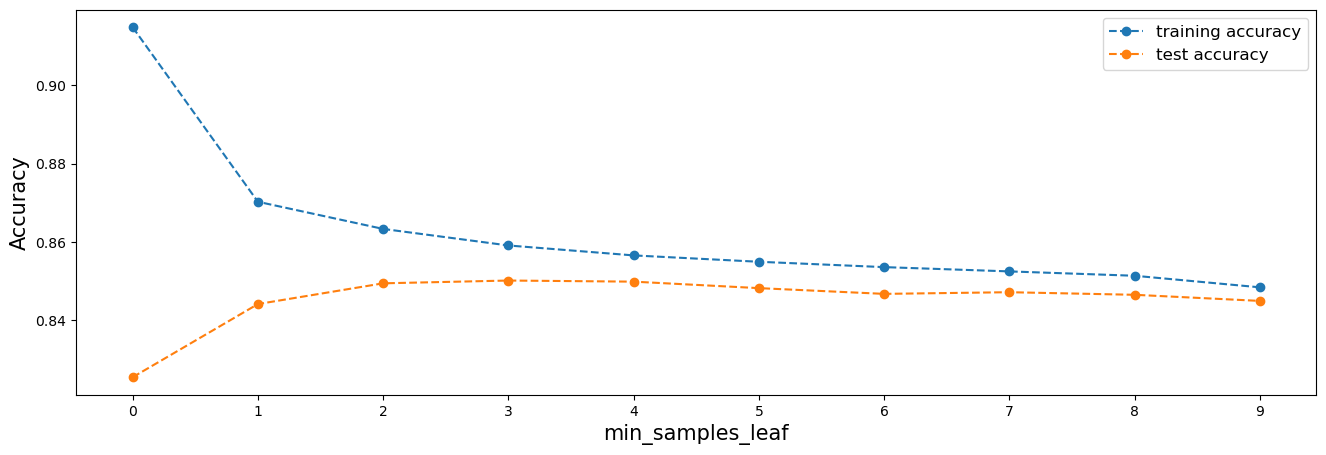

In [49]:
# plotting accuracies with min_samples_leaf vs mean train and test accuracy

plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_leaf", size=15) 
plt.ylabel("Accuracy", size=15)
plt.xticks(range(0,10,1))

plt.show()

Observe for low values of min_samples_leaf tree gets a bit overfitted, min_sample_leaf value is good after may be 5

# Tuning `min_samples_split`
`This shoews minimum no. of samples required to split an internal node`
* `default value` => `2`
    * it means that even if a node is having 2 samples it can be furthur divided into leaf nodes

In [50]:
# specifying number of folds for k-fold CV
n_folds = 10

# parameters to build the model on (min_samples_split with range 5 to 200 with step size as 20)
parameters = {"min_samples_split":range(5,200,20)}

# instantiating model(DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)

# instantiating GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
GScv = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

#fitting the above tree on training data
GScv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [51]:
# scores of GridSearchCV
scores_GScv = GScv.cv_results_

#Checking scores in a dataframe
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.088403      0.015546         0.001760        0.001779   
1       0.082844      0.012643         0.001653        0.001049   
2       0.074464      0.007785         0.001802        0.000975   
3       0.077933      0.017026         0.002401        0.001180   
4       0.078515      0.009338         0.002420        0.000760   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.825758   
1                      25  {'min_samples_split': 25}           0.840436   
2                      45  {'min_samples_split': 45}           0.844223   
3                      65  {'min_samples_split': 65}           0.848011   
4                      85  {'min_samples_split': 85}           0.848958   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.801610           0.829072           0.810516           0.816675   
1           0.819129           0.848485           0.815727           0.839413   
2           0.820076           0.854167           0.833254           0.837991   
3           0.839015           0.864110           0.838939           0.838939   
4           0.839015           0.857481           0.835623           0.841781   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.814306           0.811464           0.812885           0.804832   
1           0.828991           0.825675           0.825675           0.828517   
2           0.839413           0.830412           0.832307           0.832307   
3           0.844150           0.838939           0.842729           0.834676   
4           0.848887           0.839886           0.845097           0.838465   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.813359         0.814048        0.007940               10   
1           0.826622         0.829867        0.009555                9   
2           0.831360         0.835551        0.008674                8   
3           0.829938         0.841945        0.008754                7   
4           0.832307         0.842750        0.007071                6   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.971002            0.969528            0.968844   
1            0.907373            0.909057            0.908584   
2            0.891269            0.892742            0.889006   
3            0.883848            0.885111            0.881269   
4            0.877901            0.879901            0.875954   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.970424            0.970950            0.969898   
1            0.906063            0.909641            0.906694   
2            0.889748            0.893643            0.889222   
3            0.882276            0.885065            0.883012   
4            0.879013            0.880539            0.877276   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.971108            0.972529            0.971003   
1            0.906747            0.906641            0.908694   
2            0.893064            0.891327            0.890012   
3            0.884170            0.883960            0.883907   
4            0.879802            0.879592            0.877697   

   split9_train_score  mean_train_score  std_train_score  
0            0.969687          0.970497         0.000996  
1            0.905642          0.907514         0.001308  
2            0.888485          0.890852         0.001739  
3            0.882644          0.883526         0.001159  
4            0.879644          0.878732         0.001379

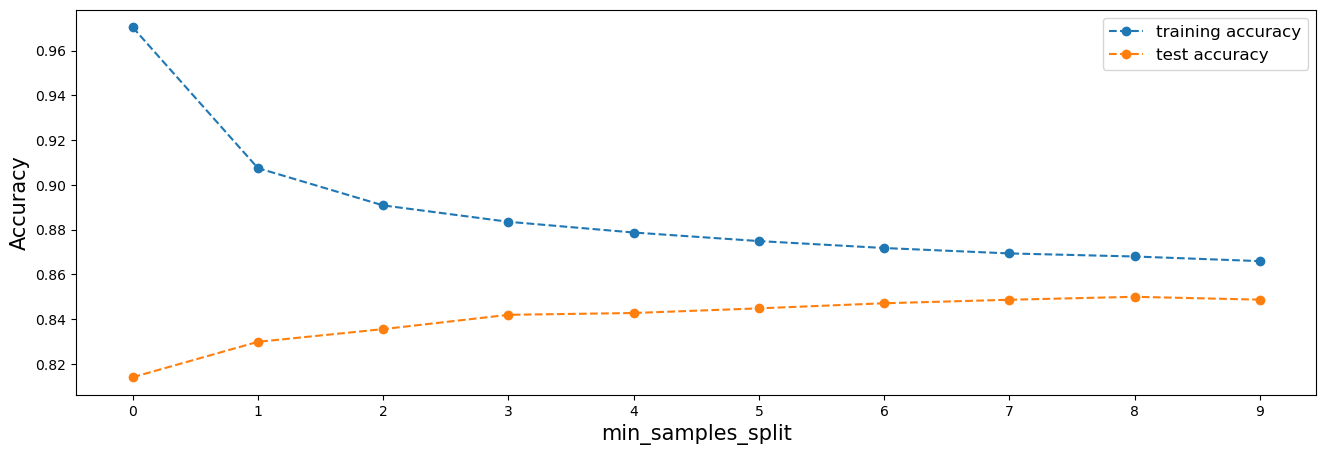

In [52]:
# plotting accuracies with min_samples_split vs mean train and test accuracy
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_split",size=15) 
plt.ylabel("Accuracy",size=15)
plt.xticks(range(0,10,1))

plt.show()

Observe that as min_sample_split increases tree overfits lesser since the model is less complex

# Finding Optimal Hyperparameters(GridSearchCV)
Using GridSearchCV to find multiple optimal hyperparameters together 
* also specify criterion (gini/entropy or IG)

In [53]:
# creating parameter grid
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
    'criterion': ["entropy","gini"]}

# number of folds
n_folds = 10
# instantiating grid search model with default parameters value
dtree = DecisionTreeClassifier(random_state=108)


# instantiating GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [54]:
# cross validation results
cv_results = grid_search.cv_results_

# printing CV_result
pd.DataFrame(cv_results).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.040396      0.009373         0.001838        0.000796   
1       0.043258      0.012111         0.002368        0.002382   
2       0.042350      0.010309         0.001924        0.000853   
3       0.039879      0.012013         0.001907        0.002579   
4       0.063759      0.013364         0.001452        0.000794   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.849432           0.829072           0.854167           0.840834   
1           0.849432           0.829072           0.854167           0.840834   
2           0.848485           0.829072           0.854167           0.840834   
3           0.848485           0.829072           0.854167           0.840834   
4           0.852273           0.837595           0.856534           0.843202   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
0           0.848413           0.852676           0.837044           0.847466   
1           0.848413           0.852676           0.837044           0.847466   
2           0.848413           0.852676           0.837044           0.847466   
3           0.848413           0.852676           0.837044           0.847466   
4           0.846045           0.847466           0.837991           0.846518   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0           0.837991           0.843202         0.844030        0.007467   
1           0.837991           0.843202         0.844030        0.007467   
2           0.837991           0.843202         0.843935        0.007404   
3           0.837991           0.843202         0.843935        0.007404   
4           0.831360           0.851255         0.845024        0.007265   

   rank_test_score  
0               13  
1               13  
2               15  
3               15  
4                9

**`printing Optimal Accuracy Score`**

In [55]:
# printing
print(f' Best Accuracy you can get:\n {grid_search.best_score_}\n','***'*15)

# printing best hyperparameters parameters & its values
print(f' Best Hyperparameters Parameters & there Values: \n{grid_search.best_params_}')

 Best Accuracy you can get:
 0.848386876821268
 *********************************************
 Best Hyperparameters Parameters & there Values: 
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


**`running model with best parameters obtained from GridSearchCV`**

In [56]:
# model with optimal hyperparameters also add random state as 108
dt_with_optimal_hyperparameters = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=50,
                                  min_samples_split=50,random_state=108)


# fitting above model with training data
model_dt = dt_with_optimal_hyperparameters.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=108)

In [57]:
from sklearn import metrics

In [58]:
# printing model score
y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.8436291302906398

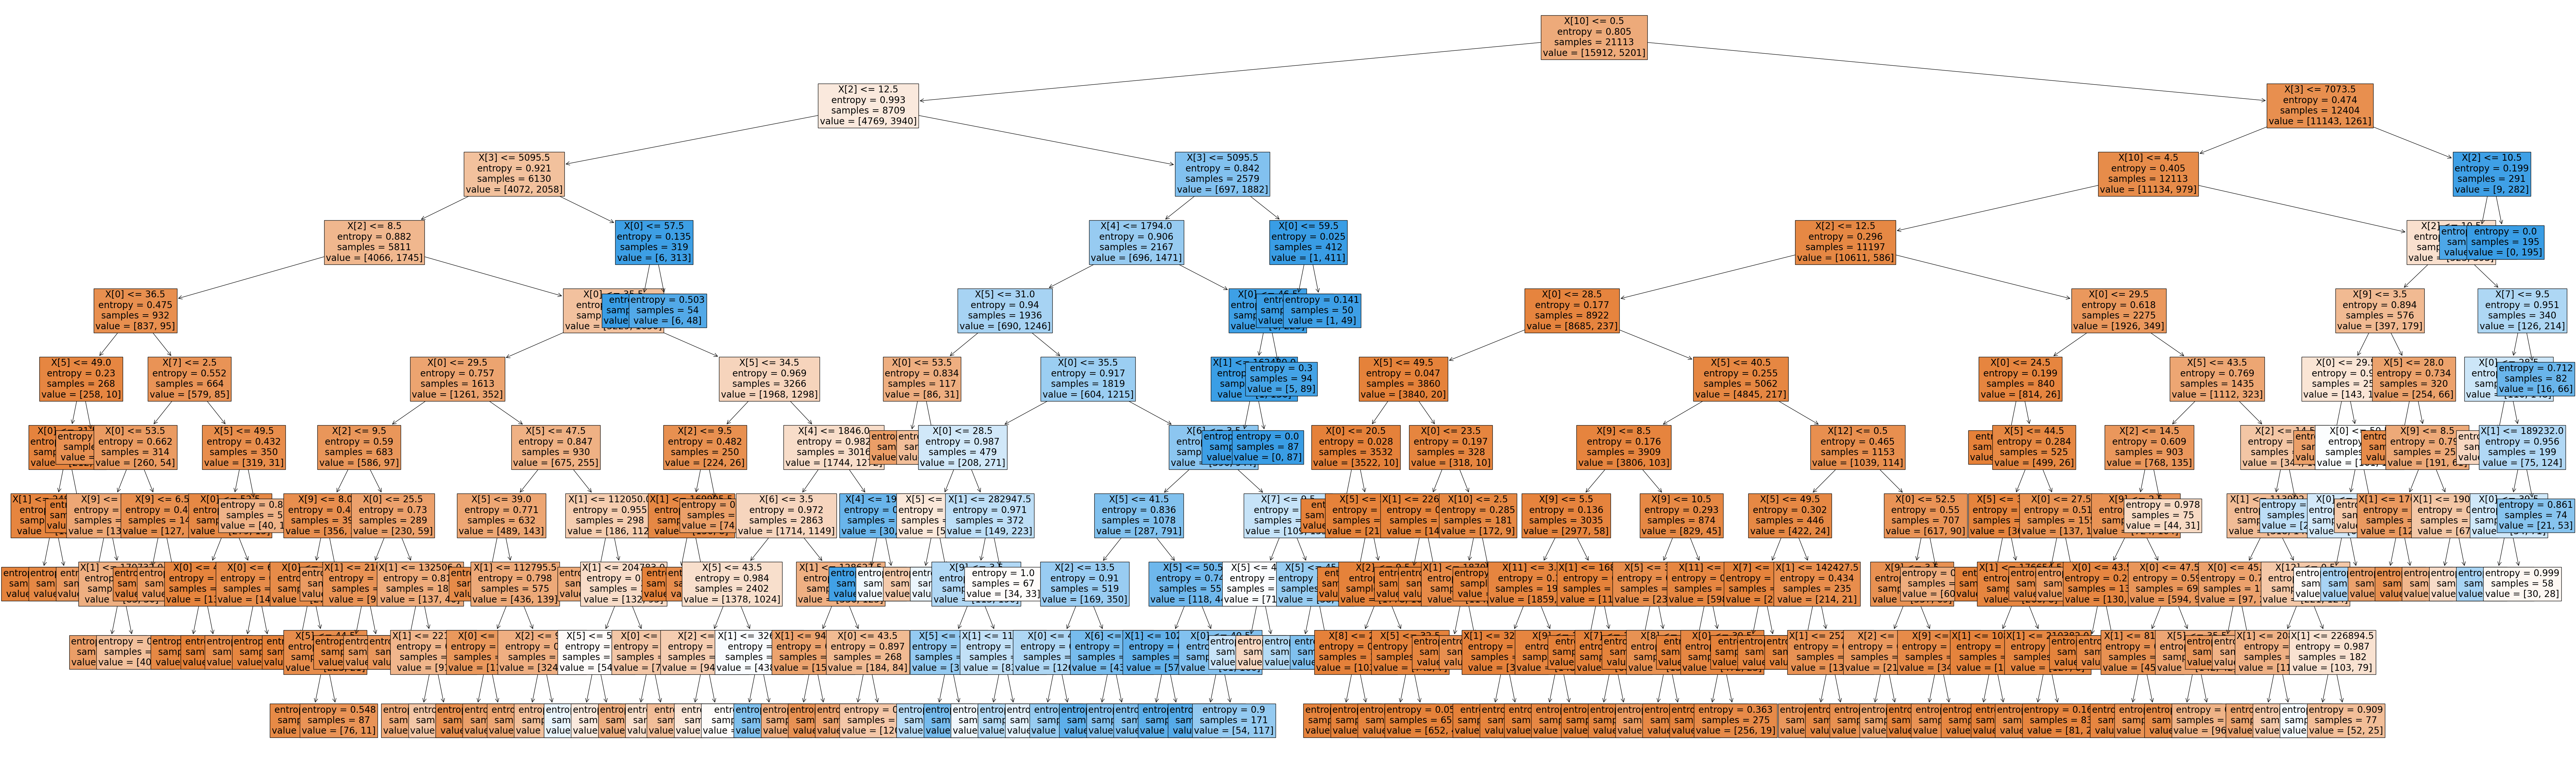

In [59]:
# plotting tree
fig = plt.figure(figsize=(100,30))
plot_tree(model_dt,filled=True,fontsize=20)
plt.show()

### saving tree figure to analysie further
###fig.savefig('tree.png',format='png')

In [60]:
print(export_text(model_dt))

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- feature_0 <= 36.50
|   |   |   |   |   |--- feature_5 <= 49.00
|   |   |   |   |   |   |--- feature_0 <= 31.50
|   |   |   |   |   |   |   |--- feature_1 <= 248984.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  248984.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  31.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  49.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  36.50
|   |   |   |   |   |--- feature_7 <= 2.50
|   |   |   |   |   |   |--- feature_0 <= 53.50
|   |   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  2.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 170732.00
|   |   |   |   |   |   |   |   

Observe that this tree is too complex to understand

**`Let's try reducing just `max_depth` and see how tree looks`**

In [61]:
# tree with max_depth = 3
dt_with_max_depth_optimal_hyperparameters =  DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=50,
                                   min_samples_split=50,random_state=108)


# fitting model with training data
model_dt = dt_with_max_depth_optimal_hyperparameters.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50,
                       min_samples_split=50, random_state=108)

In [62]:
# printing model score
y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.8326886948834126

accuracy_score is decreasing

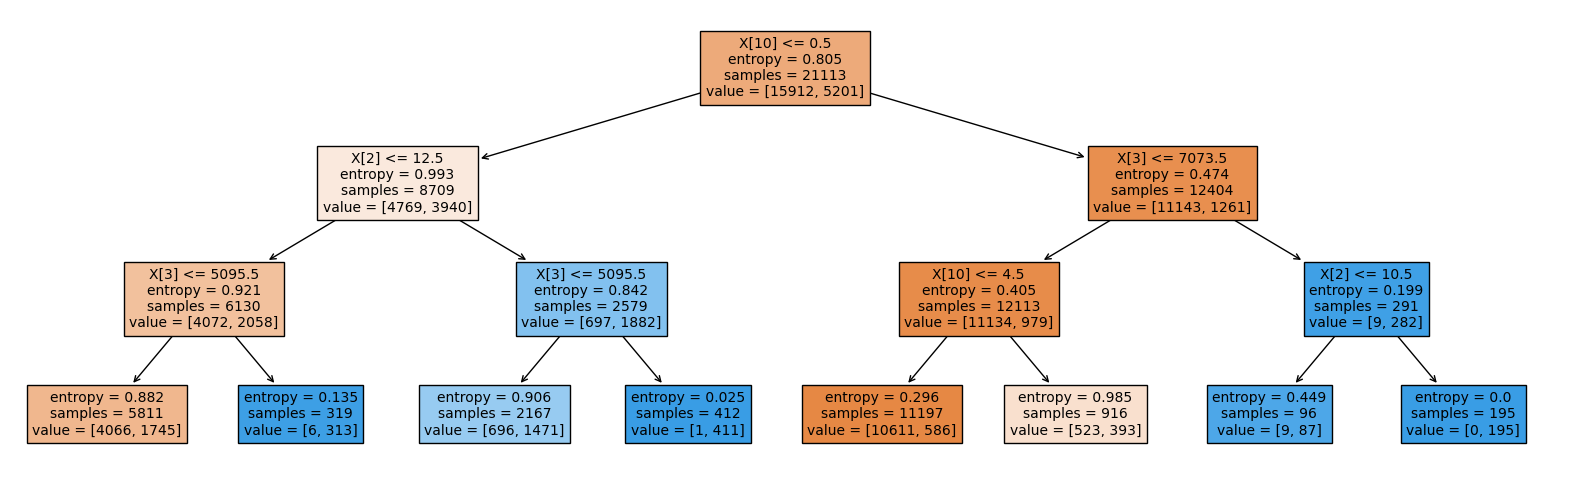

In [63]:
# plotting tree for max_depth=3

plt.figure(figsize=(20,6))

plot_tree(model_dt,filled=True,fontsize=10)

plt.show()

In [64]:
print(export_text(model_dt))

|--- feature_10 <= 0.50
|   |--- feature_2 <= 12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  5095.50
|   |   |   |--- class: 1
|   |--- feature_2 >  12.50
|   |   |--- feature_3 <= 5095.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  5095.50
|   |   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- feature_3 <= 7073.50
|   |   |--- feature_10 <= 4.50
|   |   |   |--- class: 0
|   |   |--- feature_10 >  4.50
|   |   |   |--- class: 0
|   |--- feature_3 >  7073.50
|   |   |--- feature_2 <= 10.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  10.50
|   |   |   |--- class: 1



`Observe above tree looks bit more clear and understanding`

So can say after loosing accuracy of almost 1% we have got loat of interpretability for out DT model

In [65]:
# printing matrix of classification_report
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6742
           1       0.79      0.47      0.59      2307

    accuracy                           0.83      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.83      0.82      9049



[[6443  299]
 [1215 1092]] 
 ******************************


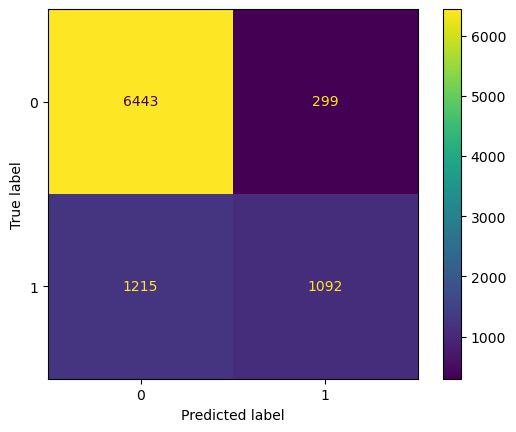

In [66]:
# printing confusion matrix 
print(metrics.confusion_matrix(y_test,y_pred_test),'\n','***'*10)

# ploting confusion matrix
plot_confusion_matrix(model_dt,X_test,y_test)

plt.show()

Observe above model is not much better than default model

Still its fine not that bad. Atleast now tree is not much complex to understand

# Pruning Descision Tree
See Pruning as a factor which `protects DT to Overfit`
* It involves selective removal of certain parts of a tree
* It makes DT versatile so that it can adapt if we feed any new kind of data to it, thereby fixing problem of overfitting oveo
* `Reduces size of a Decision Tree` which might slightly `increasev training error` but `drastically decrease testing error`, hence making it more adaptable

---
`Minimal Cost-Complexity` pruning is one of the types of Pruning of Decision Trees 
* This algorithm is parameterized by `α(≥0)` known as `complexity parameter`
* [Plot_Cost_Complexity_Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)


DecisionTree in sklearn has a function called `cost_complexity_pruning_path` it:
* `gives effective alphas` of subtrees during pruning and also `corresponding impurities`
    * these values of `alpha can be used to prune our Decision Tree`

# Aplying Pruning on Last model

In [67]:
# model built with proper hyperparameter
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50,
                       min_samples_split=50, random_state=108)

In [68]:
# initialising cost_complexity_pruning_path with training data
pruning_path = model_dt.cost_complexity_pruning_path(X_train,y_train)

# checling out ccp_alphas and impurities
alphas, impurities = pruning_path.ccp_alphas,pruning_path.impurities

In [69]:
# all alpha value
alphas

array([0.        , 0.00070217, 0.00939715, 0.02261543, 0.03253962,
       0.03965266, 0.04347662, 0.11701538])

In [70]:
# all impurities value
impurities

array([0.54002822, 0.54073039, 0.55012755, 0.57274298, 0.6052826 ,
       0.64493526, 0.68841188, 0.80542726])

**Now I am trying to set these values of `alpha` and `pass them to ccp_alpha parameter of our DecisionTreeClassifier` as by looping over `alphas array` I will find `accuracy on both Train and Test parts of this dataset`**

In [71]:
# initialising empty arrays for storing train and test accuracy
train_accuracy, test_accuracy = [],[]

# iterating over ccp_alpha
for ccp_alpha in alphas:
    # instantiating DecisionTreeClassifier with random_state=108 and ccp_alpha as alpha iterated value
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=108)
    # fitting model on training data
    dt_clf.fit(X_train,y_train)
    
    # predicting on train data
    y_pred_train= dt_clf.predict(X_train)
    # predicting on test data
    y_pred_test= dt_clf.predict(X_test)
    
    # appending training accuracy 
    train_accu = metrics.accuracy_score(y_pred_train,y_train)
    train_accuracy.append(train_accu)
    # appending test accuracy 
    test_accu = metrics.accuracy_score(y_pred_test,y_test)
    test_accuracy.append(test_accu)

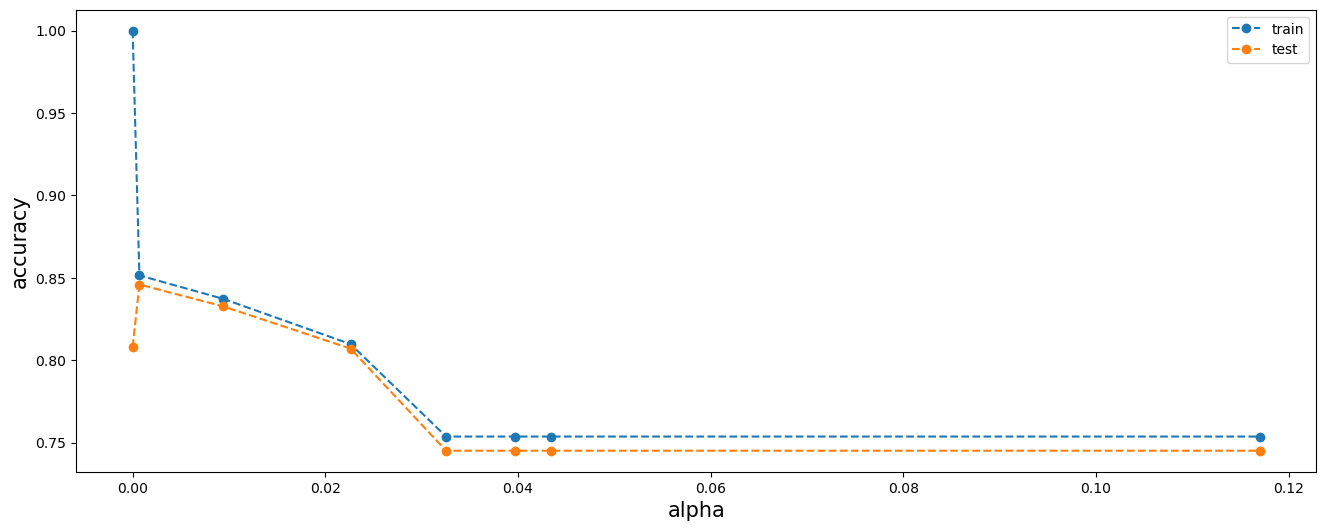

In [72]:
# plotting all alphas vs Train and test accuracy scores
plt.figure(figsize=(16,6))

plt.plot(alphas,train_accuracy,label='train',marker='o',linestyle='dashed')
plt.plot(alphas,test_accuracy,label='test',marker='o',linestyle='dashed')

plt.legend(loc="best",prop={'size':10})
plt.xlabel('alpha',size=15)
plt.ylabel('accuracy',size=15)

plt.show()

Observe see that `between first and second alpha values we get maximum test accuracy` although our train accuracy has decreased to 0.8
* `this model is now more generalized and it will perform better on unseen data`

Now I will `add ccp_alpha as another hyperparameter along with grid searched parameters in this deciscion tree model`

In [73]:
# will add ccp_alpha value to it
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50,
                       min_samples_split=50, random_state=108)

In [74]:
'''Seting '0.01'  as ccp_alpha value in our final deciscion tree'''

# instantiating DecisionTreeClassifier
final_dt_clf = DecisionTreeClassifier(ccp_alpha=0.01,random_state=108)

# fitting model on training data
final_model = final_dt_clf.fit(X_train,y_train)

# predicting on train data
y_pred_train = final_model.predict(X_train)

# predicting on test data
y_pred_test = final_model.predict(X_test)

# printing final test and train accuracy
final_train_accuracy = metrics.accuracy_score(y_pred_train,y_train)
final_test_accuracy = metrics.accuracy_score(y_pred_test,y_test)

print(f' Final_train_accuracy\n {final_train_accuracy}','\n','***'*6)
print(f' Final_test_accuracy\n {final_test_accuracy}')

 Final_train_accuracy
 0.837256666508786 
 ******************
 Final_test_accuracy
 0.8326886948834126


`Model Results seems very much trustworthy now`

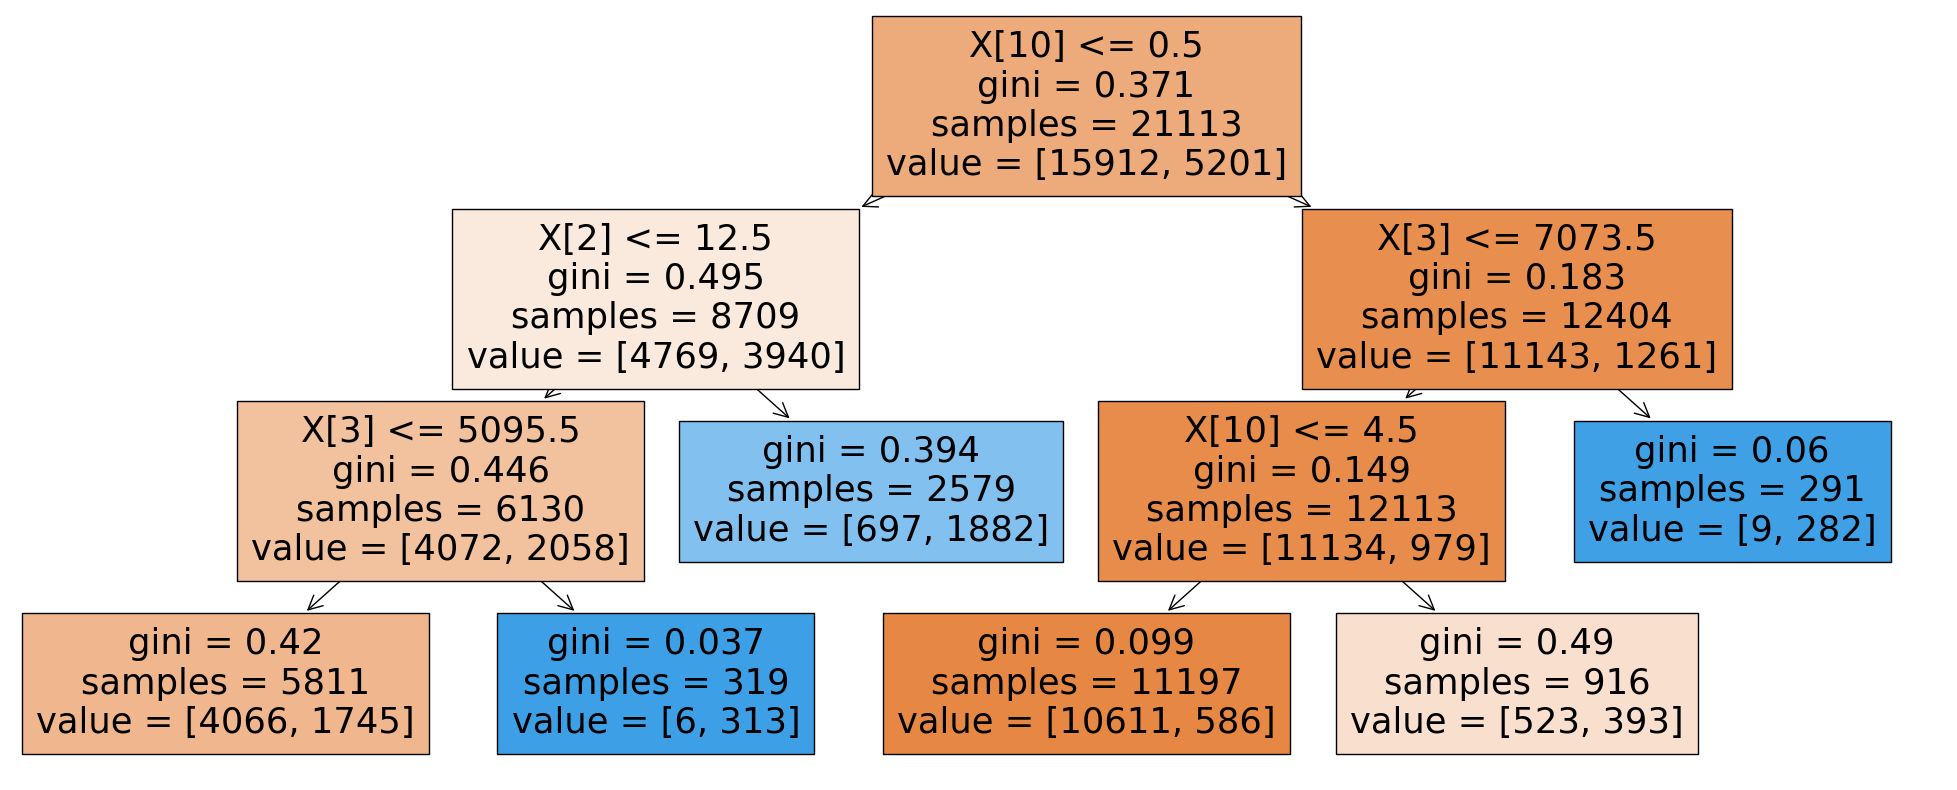

In [75]:
# plotting tree  
plt.figure(figsize=(25,10))

plot_tree(final_model,filled=True)

plt.show()